In [1]:
# basic_example.ipynb
# Authors: Stephan Meighen-Berger
# Basic script to show off what nuisance can do

In [2]:
# imports
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Module import
from nu_isance import Nuisance, config

In [4]:
# A nusciance instance with options
config['oscillation']['matter'] = True
nuisance = Nuisance()

INFO: Starting
INFO: Welcome to nuisance. I'm here to help
INFO: Please note more information on functions can be fetched by using .__doc__!
INFO: Propagating through matter
INFO: Building the oscillation grids
INFO: Using 1 as the anti setting
INFO: For nu_e...


100%|██████████| 400/400 [00:14<00:00, 28.03it/s]

INFO: Done!
INFO: For nu_mu...



100%|██████████| 400/400 [00:07<00:00, 56.54it/s]

INFO: Done!
INFO: For nu_tau...



100%|██████████| 400/400 [00:07<00:00, 55.13it/s]

INFO: Done!
INFO: Setup took -29 seconds


In [5]:
# Fetching the used grids
e_grid = config["oscillation"]["energy grid"]
cosZ = config["oscillation"]["angle grid"]
zenith = np.rad2deg(np.arccos(cosZ))

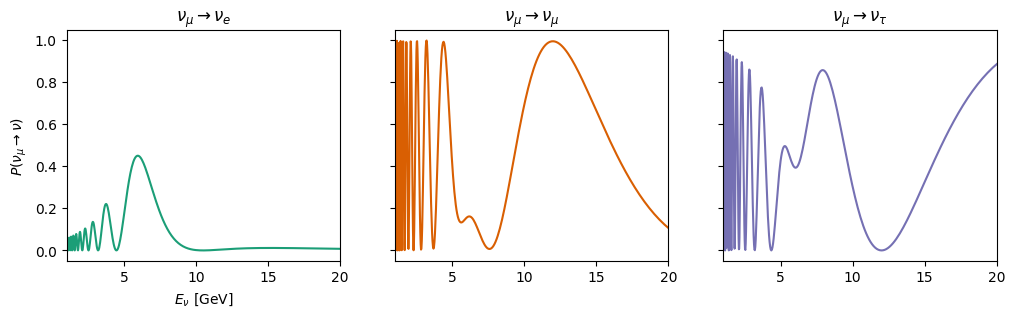

In [10]:
# ------------------------------------------------------------------------------
# Plotting
# ------------------------------------------------------------------------------
# Setup
_, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
colors = [
    "#1b9e77",
    "#d95f02",
    "#7570b3"
]
# ------------------------------------------------------------------------------
# Grids
nu_mu_e_180 = nuisance.osc.oscillation_prob_mu[0][0]
nu_mu_mu_180 = nuisance.osc.oscillation_prob_mu[1][0]
nu_mu_tau_180 = nuisance.osc.oscillation_prob_mu[2][0]
# ------------------------------------------------------------------------------
# Nu_e -> Nu_e
axs[0].plot(
    e_grid, nu_mu_e_180,
    color=colors[0], ls='-'
)
axs[0].set_xscale('linear')
axs[0].set_xlim(1, 20)
axs[0].set_xlabel(r'$E_\nu$ [GeV]')
axs[0].set_ylabel(r'$P(\nu_\mu\rightarrow\nu )$')
axs[0].set_title(r'$\nu_\mu\rightarrow \nu_e$')
# ------------------------------------------------------------------------------
# Nu_e -> Nu_mu
axs[1].plot(
    e_grid, nu_mu_mu_180,
    color=colors[1], ls='-'
)
axs[1].set_xscale('linear')
axs[1].set_xlim(1, 20)
axs[1].set_title(r'$\nu_\mu\rightarrow \nu_\mu$')
# ------------------------------------------------------------------------------
# Nu_e -> Nu_tau
axs[2].plot(
    e_grid, nu_mu_tau_180,
    color=colors[2], ls='-'
)
axs[2].set_xscale('linear')
axs[2].set_xlim(1, 20)
axs[2].set_title(r'$\nu_\mu\rightarrow \nu_\tau$')
# ------------------------------------------------------------------------------
# Saving
plt.savefig('../pics/oscillation_slices.png', dpi=250)

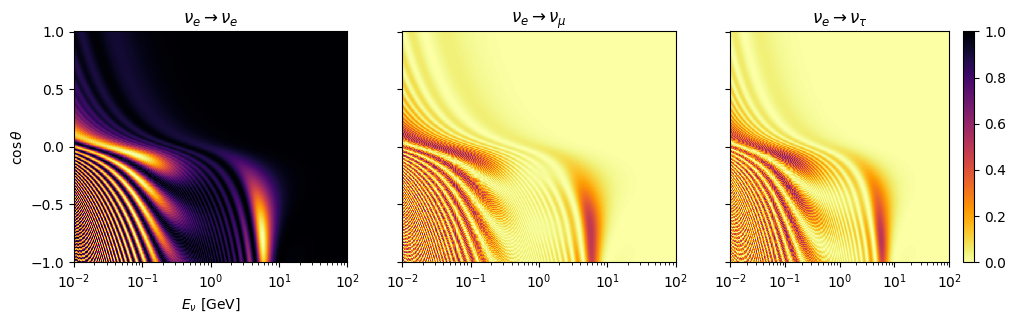

In [7]:
# ------------------------------------------------------------------------------
# Plotting
# ------------------------------------------------------------------------------
# Setup
_, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
# ------------------------------------------------------------------------------
# Grids
nu_e_e = nuisance.osc.oscillation_prob_e[0]
nu_e_mu = nuisance.osc.oscillation_prob_e[1]
nu_e_tau = nuisance.osc.oscillation_prob_e[2]
Xfine, Yfine = np.meshgrid(e_grid, cosZ)
# ------------------------------------------------------------------------------
# Nu_e -> Nu_e
axs[0].pcolormesh(
    Xfine, Yfine, nu_e_e,
    cmap='inferno_r', vmin=0, vmax=1
)
axs[0].set_xscale('log')
axs[0].set_xlim(min(e_grid), max(e_grid))
axs[0].set_xlabel(r'$E_\nu$ [GeV]')
axs[0].set_ylabel(r'$\cos\theta$')
axs[0].set_title(r'$\nu_e\rightarrow \nu_e$')
# ------------------------------------------------------------------------------
# Nu_e -> Nu_mu
axs[1].pcolormesh(
    Xfine, Yfine, nu_e_mu,
    cmap='inferno_r', vmin=0, vmax=1
)
axs[1].set_xscale('log')
axs[1].set_xlim(min(e_grid), max(e_grid))
axs[1].set_xlabel(r'$E_\nu$ [GeV]')
axs[1].set_title(r'$\nu_e\rightarrow \nu_\mu$')
# ------------------------------------------------------------------------------
# Nu_e -> Nu_tau
pc = axs[2].pcolormesh(
    Xfine, Yfine, nu_e_tau,
    cmap='inferno_r', vmin=0, vmax=1
)
axs[2].set_xscale('log')
axs[2].set_xlim(min(e_grid), max(e_grid))
axs[2].set_xlabel(r'$E_\nu$ [GeV]')
axs[2].set_title(r'$\nu_e\rightarrow \nu_\tau$')
# ------------------------------------------------------------------------------
# Color bar
plt.colorbar(pc)
# ------------------------------------------------------------------------------
# Saving
plt.savefig('../pics/oscillation_picture.png', dpi=250)